In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

# Loading and checking
Going to load in the data and check it for duplicates and data types

In [2]:
df = pd.read_csv('DataFiles\cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

* The target is close to a 60/40 split, close to balanced.
* Everything else looks good. I'm going to drop id, and going to split the data in test and train

# Machine Learning Steps
* Here I'm going to create my data splits, my preprocessors, pipelines, models, and hyperparameter tuning
* This is a binary classification problem, so my metrics will revolve around the confusion matrix. My goal while creating these models is building a model that accurately predicts malignant tumors (our positive class) while minimizing false negatives, or Type 2 Errors. I want to minimize false negatives because I believe it is better to receive some false positives than it is to have a false negative and allow the cancer to go untreated.
* The goal here is to have a high Recall score, and high Accuracy

## Train test split

In [7]:
X = df.drop(columns = ['id', 'diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Preprocessor 
Because all of the data is float, numeric, all I need is the StandardScaler.

In [8]:
preprocessor = StandardScaler()

## Logistic Regression
Going to create a base model and score it

In [9]:
BaseLog = LogisticRegression(solver = 'liblinear', max_iter = 1000)
BaseLogPipe = make_pipeline(preprocessor, BaseLog).fit(X_train, y_train)

Since I'll be running multiple models to find the best one, I am going to make a function to print out the metrics for any given model

In [10]:
def class_metrics(model, y, X, name = 'Model'):
    # Print out classification report
    print(f'Test report on {name}: \n{classification_report(y,model.predict(X))}')
    # Plot a confusion matrix heatmap
    ConfusionMatrixDisplay.from_predictions(y, model.predict(X), normalize = 'true')

Test report on Base Logistic Regression on Test Data: 
              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



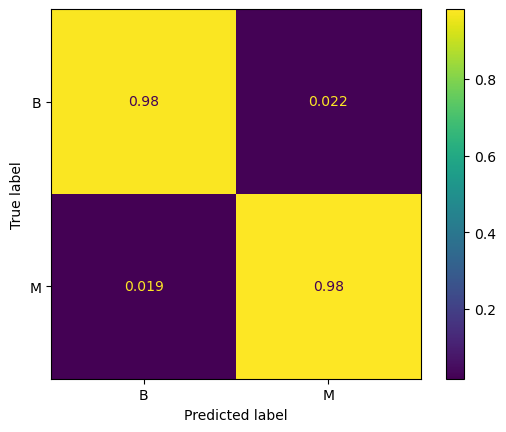

In [11]:
class_metrics(BaseLogPipe, y_test, X_test, 'Base Logistic Regression on Test Data')

This model is very strong. It has a high accuracy of .98, and high recall on the positive class of .98. I will try and tune the alpha on L1 and L2 to see if we can improve this score

In [12]:
BaseLogPipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(max_iter=1000, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=1000, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [27]:
# Creating the dictionary to pass to gridsearch
logparams = {'logisticregression__C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000,10000],
          'logisticregression__penalty':['l1','l2']}

LogGridSearch = GridSearchCV(BaseLogPipe, logparams, n_jobs = -1)

In [28]:
LogGridSearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                                   1.0, 10, 100, 1000, 10000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [29]:
LogGridSearch.best_params_

{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}

After tuning the alpha (C) and the penalty type ('l1' or 'l2'), it looks like the best Parameters for C and penalty are the base values, 1.0 and l2. So the base model is the best model

## K-Nearest Neighbors
Now to try K Nearest Neighbors. Lets start with a base and score it

In [16]:
KNN = KNeighborsClassifier()
KNNPipe = make_pipeline(preprocessor,KNN).fit(X_train, y_train)

Test report on K Nearest Neighbors Base on Test Data: 
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        89
           M       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



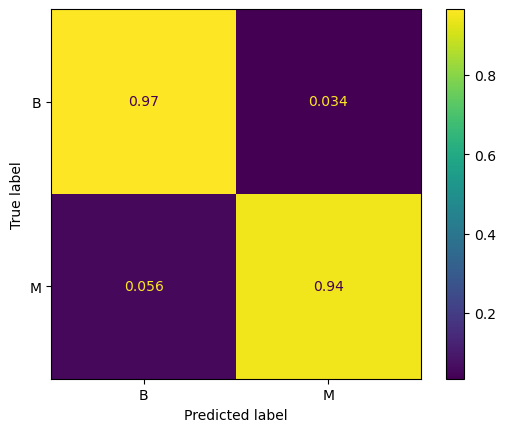

In [17]:
class_metrics(KNNPipe, y_test, X_test, 'K Nearest Neighbors Base on Test Data')

* Another strong response to the training data, but not as good as the Logistic Regression. Recall on the positive class is .94
* Lets tune the model parameters to find a better fit

In [18]:
KNNPipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [30]:
kparams = {'kneighborsclassifier__n_neighbors': list(range(1,21)),
          'kneighborsclassifier__weights': ['uniform','distance']}
KNNGridSearch = GridSearchCV(KNNPipe, kparams, n_jobs=-1)

In [31]:
KNNGridSearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [32]:
KNNGridSearch.best_params_

{'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__weights': 'uniform'}

* I tried to tune hte number of neighbors, and the weights of the model.
* Once again, the model has the best accuracy with the base parameters: n_neighbors = 5 and weights = uniform

## Random Forest
I will now create a random forest model and tune it. Beginning with a base model

In [33]:
rf = RandomForestClassifier(random_state = 42)
rfPipe = make_pipeline(preprocessor, rf).fit(X_train, y_train)

Test report on Base Random Forest on Test Data: 
              precision    recall  f1-score   support

           B       0.97      0.98      0.97        89
           M       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



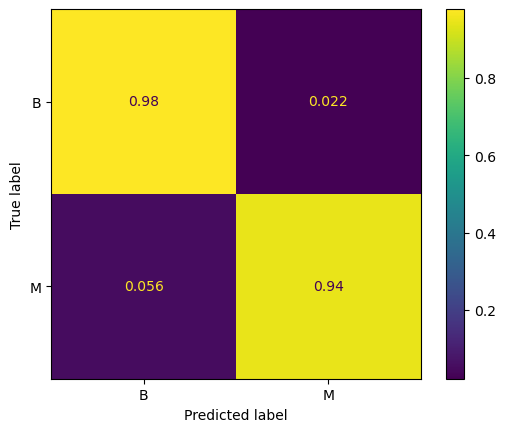

In [34]:
class_metrics(rfPipe, y_test, X_test, 'Base Random Forest on Test Data')

This base model performs as good as the KNN model, but not as good as Logistic Regression. Lets tune some parameters

In [37]:
rfPipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfore

In [47]:
depths = max([estimator.get_depth() for estimator in rfPipe['randomforestclassifier'].estimators_])
depths

11

In [49]:
rfparams = {'randomforestclassifier__n_estimators': np.arange(10,301,10),
          'randomforestclassifier__max_depth': range(1,12), # max depths +1
          'randomforestclassifier__min_samples_split': [2,5,10],
          'randomforestclassifier__min_samples_leaf': [1,5,10]}
rfGridSearch = GridSearchCV(rfPipe, rfparams, n_jobs = -1)

In [50]:
rfGridSearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(1, 12),
                         'randomforestclassifier__min_samples_leaf': [1, 5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300])})

In [51]:
rfGridSearch.best_params_

{'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 140}

* I tested max depth, minimun samples per leaf, minimum samples per split, and number of estimators
* The best result I got was 
    * max depth: 7
    * min samples per leaf: 1
    * min samples per split: 5
    * number of estimators: 140

Lets build a model with these hyper parameters and see the results

In [52]:
bestrf = RandomForestClassifier(random_state = 42, max_depth = 7, n_estimators = 140, min_samples_leaf = 1, min_samples_split = 5)
BestRfPipe = make_pipeline(preprocessor, bestrf).fit(X_train, y_train)

Test report on Best Random Forest on Test Data: 
              precision    recall  f1-score   support

           B       0.97      0.98      0.97        89
           M       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



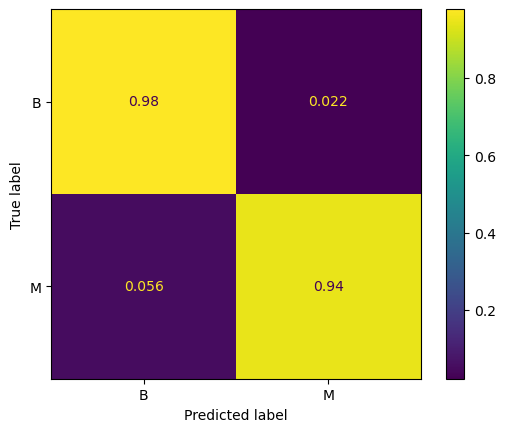

In [53]:
class_metrics(BestRfPipe, y_test, X_test, 'Best Random Forest on Test Data')

# Final Note
* A False Negative, or a Type 2 error, is when the model predicts a negative class incorrectly. Meaning the model predicted Benign, when it was actually Malignant.
* A False Positive, or a Type 1 error, is when the model predicts a positive class incorrectly. Meaning the model predicted Malignant, and it was actually Benign.
* As stated earlier in the notebook, we want to minimize false positives in this model, as letting a malignant tumor go undiagnosed is worse than a false positive.
* Even after tuning the Random Forest, the best model was the Logistic Regression with a Recall of .97 on the Positive Class. Recall punishes Type 2 Errors, and a high recall will have lower Type 2 Errors. 